# DATA ANALYSIS PROJECT
---
# Analyzing Fitness Patterns and Predicting Calorie Expenditure for Gym Members

---

**Objectives:**

**1.	Analyze Patterns in Gym Members' Fitness Habits:**

*	Understand how demographic factors (e.g., age, gender) influence workout preferences and intensity.

*	Explore the relationship between workout type, duration, and calorie expenditure.

**2.	Predict Calorie Burn:**

*	Build a predictive model to estimate calories burned based on workout parameters and physiological metrics (e.g., BMI, heart rate).

**3.	Insights for Health and Fitness Recommendations:**

*	Identify the factors most associated with higher fitness levels and efficient calorie burn.

*	Provide actionable recommendations for gym-goers based on their experience levels.


# **1. Importing Data**

Steps:
*   Load the dataset into Python using pandas found from Kaggle.
*   Importing each library used for the project.
*   Inspecting the data to understand the structure, data types, and summary statistics.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/gym_members_exercise_tracking.csv"

gym_data = pd.read_csv(path)

# Info for the columns, number of rows and data types
gym_data.info()

print()
print()

gym_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


# **2. Data Cleaning**

Steps:






# **2.1.   Handle Missing Values:**
*   Identify missing or null values using gym_data.isnull().sum().
*   Impute or drop missing data (e.g., mean imputation for numerical columns, mode for categorical ones).

In [3]:
# Check for missing values
print(gym_data.isnull().sum())

# Handling missing values by replacing them with mean
gym_data['Calories_Burned'].fillna(gym_data['Calories_Burned'].mean(), inplace=True)


Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


<ipython-input-3-4ceca5eb5480>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gym_data['Calories_Burned'].fillna(gym_data['Calories_Burned'].mean(), inplace=True)


# **2.2 Detect and "Handle" Outliers**


*   This code is used to detect and handle outliers in the Calories_Burned column of the gym_data DataFrame, using the Interquartile Range (IQR) method.




In [4]:
# Detect outliers using IQR for Calories_Burned
Q1 = gym_data['Calories_Burned'].quantile(0.25)
Q3 = gym_data['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = gym_data[(gym_data['Calories_Burned'] < Q1 - 1.5 * IQR) | (gym_data['Calories_Burned'] > Q3 + 1.5 * IQR)]

# Capping or removing outliers
gym_data['Calories_Burned'] = gym_data['Calories_Burned'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 10


# **2.3. Standardize or Format Categorical Variables**

*   Ensuring categorical variables like Workout_Type and Gender are clean and consistent:


In [5]:
# Correct typos or inconsistencies
gym_data['Workout_Type'] = gym_data['Workout_Type'].str.strip().str.capitalize()
gym_data['Gender'] = gym_data['Gender'].str.strip().str.capitalize()

# Check unique values after cleaning
print(gym_data['Workout_Type'].unique())
print(gym_data['Gender'].unique())

['Yoga' 'Hiit' 'Cardio' 'Strength']
['Male' 'Female']


# **2.4. Convert Units or Rename Columns**

* Converting units to minutes and renaming column for better consistency:

In [6]:
# Convert session duration from hours to minutes
gym_data['Session_Duration (minutes)'] = gym_data['Session_Duration (hours)'] * 60

# Drop the old column for cleanliness
gym_data.drop('Session_Duration (hours)', axis=1, inplace=True)


# **2.5. Feature Engineering**

* Adding new features, such as BMI and Experience_Level categories:

In [7]:
# Define BMI category classification
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply classification to BMI column
gym_data['BMI_Category'] = gym_data['BMI'].apply(classify_bmi)

# Check the new column
print(gym_data[['BMI', 'BMI_Category']].head())


     BMI BMI_Category
0  30.20        Obese
1  32.00        Obese
2  24.71       Normal
3  18.41  Underweight
4  14.39  Underweight


**Label Encoding for Experience_Level**

* The values [3, 2, 1] indicate the column is already numeric. Therefore, no need to remap the column unless these numbers don’t align with the semantic meanings (3 = Expert, 2 = Intermediate, 1 = Beginner).

In [11]:
print(gym_data['Workout_Type'].unique())
print(gym_data['Experience_Level'].unique())

['Yoga' 'Hiit' 'Cardio' 'Strength']
[3 2 1]


In [12]:
# Map the numerical Experience_Level back to categorical labels
experience_map = {1: 'Beginner', 2: 'Intermediate', 3: 'Expert'}
gym_data['Experience_Level'] = gym_data['Experience_Level'].map(experience_map)

# Verify the mapping worked
print(gym_data['Experience_Level'].unique())  # ['Expert', 'Intermediate', 'Beginner']


['Expert' 'Intermediate' 'Beginner']


**Encoding for Workout_Type**

* Since the column is clean, the encoding step will directly create new binary columns for each workout type (except the first one, which is dropped to avoid multicollinearity).

In [13]:
gym_data = pd.get_dummies(gym_data, columns=['Workout_Type'], drop_first=True)

# **2.6. Check for Duplicates**

Duplicates can skew analysis if the same information is counted multiple times.

In [8]:
# Check for duplicate rows
duplicates = gym_data.duplicated()

# Count and optionally remove duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")
gym_data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


# **2.7. Verify Data Types**

* Ensure each column has the correct data type for analysis (e.g., numerical, categorical).

In [9]:
print(gym_data.dtypes)

# Convert data types if necessary
# gym_data['Age'] = gym_data['Age'].astype(int)
# gym_data['Session_Duration (minutes)'] = gym_data['Session_Duration (minutes)'].astype(float)

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
Session_Duration (minutes)       float64
BMI_Category                      object
dtype: object


# **2.8. Check Data Consistency**

* Ensure logical consistency between columns (e.g., Calories_Burned should be proportional to Session_Duration).

In [10]:
# Example check: Ensure no negative values
assert (gym_data['Calories_Burned'] >= 0).all(), "Negative values found in Calories_Burned"

# **2.10. Save the Clean Data**


In [14]:
# gym_data.to_csv('gym_data_cleaned.csv', index=False)

# **3. Perform Descriptive Statistics**

* This step helps summarize the main characteristics of the data.
This step is straightforward since numerical columns like Calories_Burned, BMI, and Session_Duration (minutes) are of type float64.

In [15]:
# Descriptive statistics for numerical columns
print(gym_data.describe())

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Calories_Burned  Fat_Percentage  Water_Intake (liters)  \
count   973.000000       973.000000      973.000000             973.000000   
mean     62.223022       904.636177       24.976773               2.626619   
std       7.327060       270.430869        6.259419               0.600172   
min      50.000000       303.000000       10.000000      

**Output Presentation**

* **Numerical Statistics Table:** Provide mean, median, standard deviation, and range for metrics like Calories_Burned, BMI, and Resting_BPM.
* **Gender Distribution Pie Chart:** Visualize gender distribution using a pie or bar chart.
* **Heatmap:** Use a heatmap for correlations between numerical variables like Avg_BPM, Calories_Burned, and BMI.

Correlation Matrix:
                                    Age  Weight (kg)  Height (m)   Max_BPM  \
Age                            1.000000    -0.036340   -0.027837 -0.017073   
Weight (kg)                   -0.036340     1.000000    0.365321  0.057061   
Height (m)                    -0.027837     0.365321    1.000000 -0.017660   
Max_BPM                       -0.017073     0.057061   -0.017660  1.000000   
Avg_BPM                        0.035969     0.009717   -0.014776 -0.039751   
Resting_BPM                    0.004354    -0.032138   -0.005090  0.036647   
Calories_Burned               -0.153522     0.094611    0.085247  0.000966   
Fat_Percentage                 0.002370    -0.225512   -0.235521 -0.009056   
Water_Intake (liters)          0.041528     0.394276    0.393533  0.031621   
Workout_Frequency (days/week)  0.008055    -0.011769   -0.011270 -0.029099   
BMI                           -0.013691     0.853158   -0.159469  0.067105   
Session_Duration (minutes)    -0.019912    -

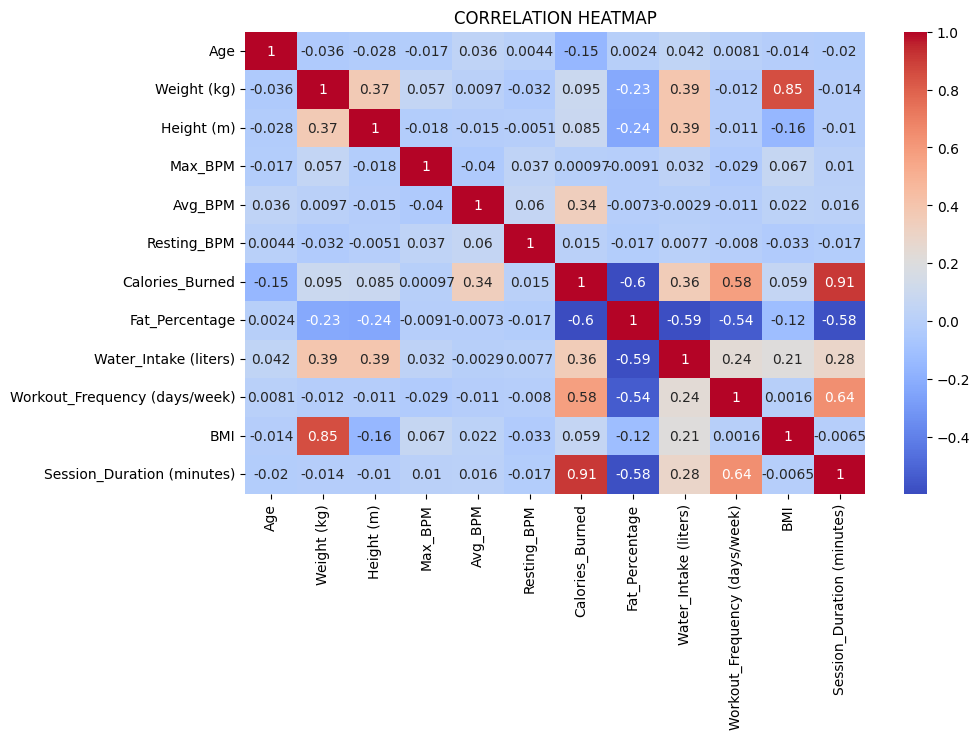

In [24]:
# Select only numerical columns
numerical_cols = gym_data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("CORRELATION HEATMAP")
plt.show()

# **3.2. Segment Data by Gender**

* Since Gender is of type object, grouping by it works without modification.

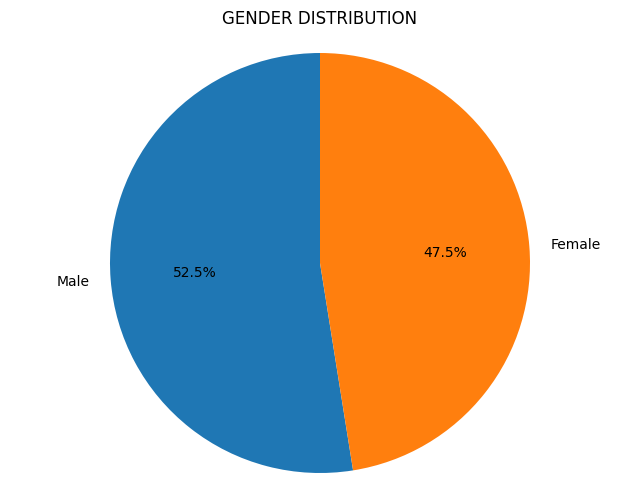

In [29]:
# Gender Distribution Pie Chart
gender_count = gym_data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('GENDER DISTRIBUTION')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **3.3. Box plot for Calories_Burned by Experience_Level**

<ipython-input-31-7a12ece4a231>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gym_data, x='Experience_Level', y='Calories_Burned', palette="Set2")


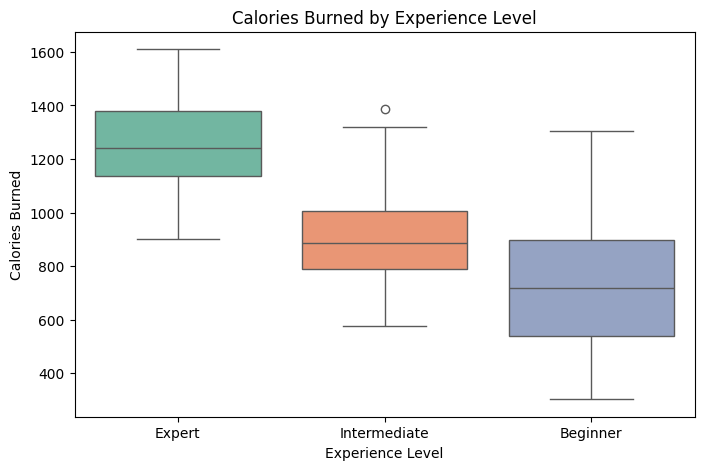

In [31]:
# Box plot for Calories_Burned by Experience_Level
plt.figure(figsize=(8, 5))
sns.boxplot(data=gym_data, x='Experience_Level', y='Calories_Burned', palette="Set2")
plt.title('Calories Burned by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')
plt.show()

Combined Segmentation
Segmentation by Gender and Experience_Level can be handled using groupby().

Segmented by Gender and Experience Level:
                          Calories_Burned        BMI
Gender Experience_Level                            
Female Beginner               693.536313  22.409385
       Expert                1191.555556  22.717111
       Intermediate           865.082902  23.028187
Male   Beginner               756.213198  26.636954
       Expert                1323.514851  26.556931
       Intermediate           935.295775  27.274695


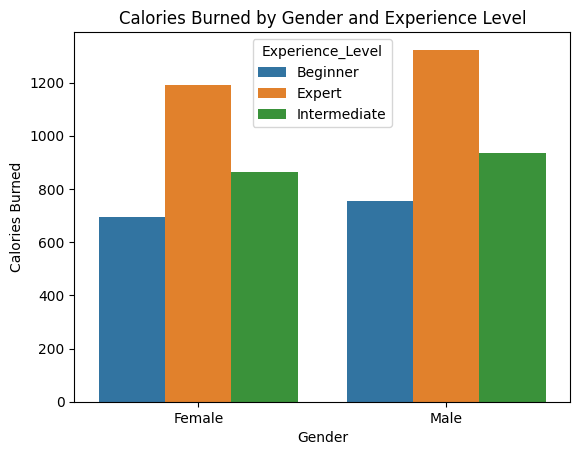

In [18]:
# Group by Gender and Experience_Level
combined_segment = gym_data.groupby(['Gender', 'Experience_Level'])[['Calories_Burned', 'BMI']].mean()
print("Segmented by Gender and Experience Level:\n", combined_segment)

# Reset index for visualization
combined_segment = combined_segment.reset_index()

# Visualization
sns.barplot(data=combined_segment, x='Gender', y='Calories_Burned', hue='Experience_Level')
plt.title('Calories Burned by Gender and Experience Level')
plt.ylabel('Calories Burned')
plt.show()


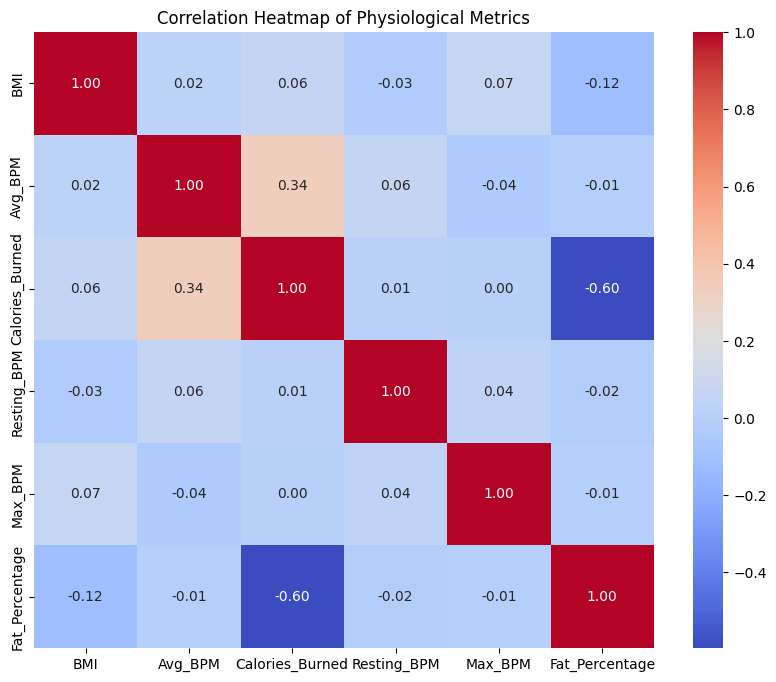

In [19]:
# Select physiological metrics for the heatmap
physio_metrics = gym_data[['BMI', 'Avg_BPM', 'Calories_Burned', 'Resting_BPM', 'Max_BPM', 'Fat_Percentage']]

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(physio_metrics.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Physiological Metrics")
plt.show()


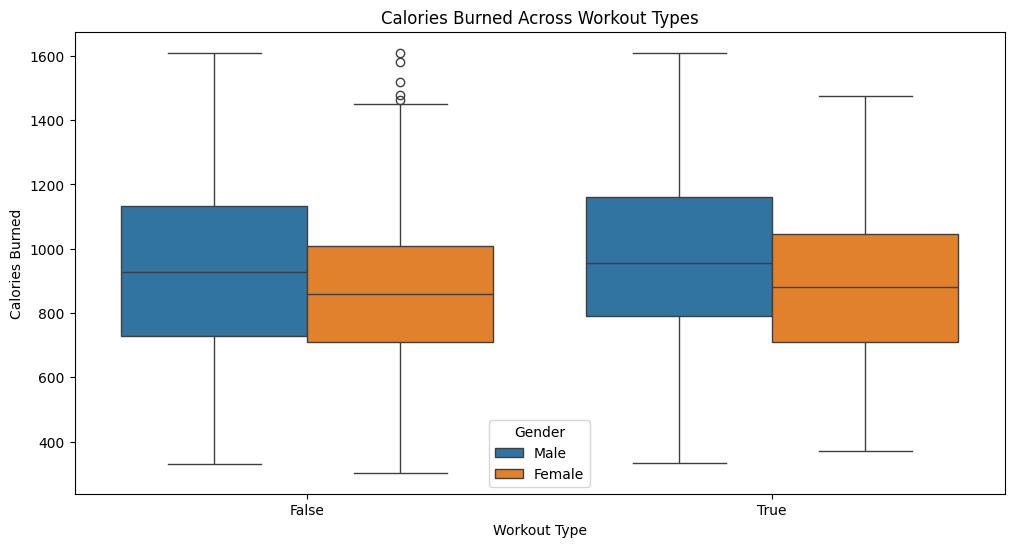

<ipython-input-20-94983f88a1c9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gym_data, x='Experience_Level', y='Calories_Burned', palette='Set2')


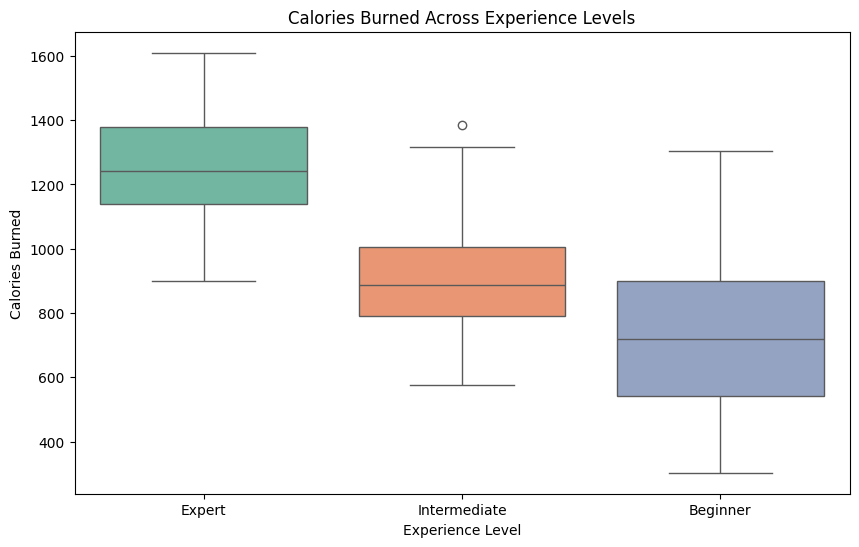

In [20]:
# Box plot for Calories_Burned across Workout Types
plt.figure(figsize=(12, 6))
sns.boxplot(data=gym_data, x='Workout_Type_Hiit', y='Calories_Burned', hue='Gender')
plt.title("Calories Burned Across Workout Types")
plt.xlabel("Workout Type")
plt.ylabel("Calories Burned")
plt.legend(title="Gender")
plt.show()

# Box plot for Calories_Burned across Experience Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=gym_data, x='Experience_Level', y='Calories_Burned', palette='Set2')
plt.title("Calories Burned Across Experience Levels")
plt.xlabel("Experience Level")
plt.ylabel("Calories Burned")
plt.show()
